In [1]:
%store -r player_stats_shoot_salary_temp
%store -r kings_player_shooting_salary

In [2]:
import plotnine as p9
import numpy as np
import statsmodels.api as sm 
import pandas as pd
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### DATA CLEANING

In [3]:
df = player_stats_shoot_salary_temp
df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,Nikola Jokic,17,17.00000,31.90000,23.00000,1.90000,7.90000,9.80000,8.80000,1.30000,0.60000,3.20000,2.80000,2.70000,31.36000,8.50000,13.60000,62.30000,0.60000,2.00000,29.40000,5.50000,6.50000,84.50000,7.90000,11.60000,68.00000,1.69300,0.65000,33047804.00000
1,Jamal Murray,16,16.00000,29.40000,17.30000,0.60000,3.20000,3.80000,5.00000,1.10000,0.20000,2.10000,1.10000,2.40000,16.43000,6.80000,15.50000,43.50000,1.80000,5.10000,35.80000,2.00000,2.60000,78.00000,4.90000,10.40000,47.30000,1.11700,0.49000,31650000.00000
3,Aaron Gordon,17,17.00000,28.50000,15.80000,2.50000,4.20000,6.70000,2.40000,0.60000,0.90000,1.40000,1.80000,1.80000,22.05000,6.10000,10.00000,60.60000,1.10000,2.80000,38.30000,2.60000,4.30000,61.60000,5.00000,7.20000,69.10000,1.58200,0.66000,19690909.00000
4,Bones Hyland,13,0.00000,21.50000,15.00000,0.20000,1.80000,2.10000,3.60000,0.60000,0.30000,1.80000,1.80000,2.00000,17.22000,4.80000,12.30000,39.40000,2.80000,6.50000,44.00000,2.50000,2.90000,84.20000,2.00000,5.80000,34.20000,1.21900,0.51000,2201520.00000
5,Kentavious Caldwell-Pope,19,19.00000,31.60000,11.60000,0.50000,2.70000,3.20000,2.30000,1.20000,0.40000,1.30000,2.00000,1.80000,12.33000,4.10000,8.50000,47.80000,2.30000,4.60000,50.00000,1.20000,1.60000,76.70000,1.70000,3.80000,45.20000,1.37300,0.61000,14004703.00000
6,Bruce Brown,20,8.00000,29.20000,11.00000,1.10000,3.40000,4.50000,4.70000,1.10000,0.60000,1.80000,2.30000,2.60000,14.04000,4.40000,9.40000,46.80000,1.30000,3.30000,38.50000,1.00000,1.10000,86.40000,3.20000,6.20000,51.20000,1.17000,0.53000,6479000.00000
7,Jeff Green,16,3.00000,19.90000,7.90000,0.80000,1.80000,2.60000,1.20000,0.40000,0.20000,1.00000,2.10000,1.20000,11.49000,2.90000,5.60000,52.80000,0.30000,1.30000,25.00000,1.80000,2.30000,77.80000,2.60000,4.30000,60.90000,1.42700,0.56000,4500000.00000
8,DeAndre Jordan,16,3.00000,16.10000,5.40000,1.60000,4.60000,6.30000,1.00000,0.20000,0.60000,1.40000,1.70000,0.70000,15.62000,2.40000,3.10000,76.00000,0.10000,0.10000,100.00000,0.60000,1.40000,43.50000,2.30000,3.10000,75.50000,1.74000,0.77000,1836090.00000
9,Zeke Nnaji,15,0.00000,10.80000,5.00000,1.00000,0.50000,1.50000,0.10000,0.20000,0.10000,0.50000,1.70000,0.30000,13.40000,2.10000,3.60000,59.30000,0.20000,0.90000,23.10000,0.50000,0.70000,80.00000,1.90000,2.70000,70.70000,1.38900,0.62000,2498760.00000
10,Vlatko Cancar,12,0.00000,11.50000,4.60000,0.10000,1.20000,1.30000,1.00000,0.50000,0.30000,0.60000,1.30000,1.70000,11.53000,1.70000,3.80000,43.50000,0.80000,1.90000,39.10000,0.50000,0.60000,85.70000,0.90000,1.90000,47.80000,1.19600,0.53000,2234359.00000


In [4]:
kings_df = kings_player_shooting_salary
kings_df

,Name,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,PER,Salary
0,De'Aaron Fox,9.10000,17.30000,52.20000,2.00000,5.20000,38.70000,4.20000,5.10000,82.40000,7.10000,12.20000,58.00000,1.40100,0.58000,18,18.00000,32.10000,24.30000,0.60000,4.40000,4.90000,6.00000,1.20000,0.50000,2.60000,2.70000,2.30000,23.54000,"$28,103,550"
1,Domantas Sabonis,6.10000,10.40000,58.60000,0.30000,1.20000,27.30000,4.40000,5.90000,74.30000,5.80000,9.30000,62.50000,1.62600,0.60000,19,19.00000,32.60000,16.90000,2.20000,8.80000,11.10000,6.40000,0.80000,0.50000,2.50000,3.80000,2.50000,21.53000,"$18,500,000"
2,Kevin Huerter,5.60000,11.40000,48.80000,3.30000,7.20000,45.60000,1.60000,2.40000,68.90000,2.30000,4.30000,54.30000,1.40600,0.63000,19,19.00000,32.20000,16.10000,0.40000,2.90000,3.30000,3.40000,1.10000,0.50000,1.60000,2.40000,2.10000,15.33000,"$14,508,929"
3,Malik Monk,5.20000,10.80000,48.10000,1.90000,5.50000,35.20000,1.90000,2.10000,90.00000,3.30000,5.30000,61.40000,1.31600,0.57000,19,0.00000,22.60000,14.30000,0.40000,1.70000,2.10000,4.30000,0.60000,0.20000,1.80000,1.80000,2.40000,18.48000,"$9,472,219"
4,Harrison Barnes,3.90000,8.40000,46.50000,0.90000,3.20000,28.30000,4.10000,4.70000,86.50000,3.00000,5.20000,57.60000,1.52200,0.52000,19,19.00000,30.70000,12.70000,1.20000,4.30000,5.50000,1.90000,0.80000,0.20000,1.20000,1.40000,1.70000,13.96000,"$18,352,273"
5,Keegan Murray,3.90000,9.60000,40.20000,1.80000,5.40000,32.60000,0.90000,1.10000,83.30000,2.10000,4.20000,50.00000,1.07900,0.49000,17,15.00000,28.80000,10.40000,0.80000,3.00000,3.80000,1.00000,0.80000,0.60000,1.60000,2.10000,0.60000,7.91000,"$8,008,440"
6,Terence Davis,2.40000,5.20000,45.70000,1.40000,3.40000,41.00000,0.70000,0.80000,85.70000,1.00000,1.80000,54.50000,1.30900,0.59000,18,1.00000,13.10000,6.80000,0.40000,2.50000,2.90000,1.40000,0.70000,0.20000,0.70000,1.80000,1.90000,17.05000,"$4,000,000"
7,Trey Lyles,2.20000,5.30000,41.20000,1.30000,3.80000,35.00000,1.00000,1.40000,72.70000,0.90000,1.60000,56.00000,1.25900,0.54000,16,0.00000,14.70000,6.70000,1.10000,1.80000,2.80000,0.80000,0.40000,0.40000,1.10000,1.10000,0.70000,12.51000,"$2,700,000"
8,Davion Mitchell,2.70000,5.80000,45.90000,0.80000,2.60000,32.00000,0.40000,0.60000,72.70000,1.80000,3.20000,57.40000,1.13500,0.53000,19,1.00000,19.10000,6.60000,0.10000,1.20000,1.30000,2.10000,0.40000,0.10000,1.10000,1.50000,2.00000,8.41000,"$4,833,600"
9,Chimezie Metu,2.20000,3.80000,57.90000,0.20000,1.00000,20.00000,0.70000,0.70000,90.90000,2.00000,2.80000,71.40000,1.38600,0.61000,15,0.00000,12.10000,5.30000,0.50000,2.40000,2.90000,0.70000,0.30000,0.10000,0.70000,1.10000,1.00000,14.55000,"$1,910,680"


In [5]:
def df_clean(df):
    df = df.drop("Name", axis = "columns").dropna()
    drop_df = df[df["AST/TO"].isin([np.inf, -np.inf])]
    df = df.drop(drop_df.index)
    for name in df.columns:
        if name in ["FGM","FGA","3PM","3PA","2PM","2PA","FTM","FTA"]:
            df = df.drop(name, axis = "columns") 
    return df


In [6]:
df = df_clean(df)

In [7]:
for name in df.columns:

    if name in ["FGM","FGA","3PM","3PA","2PM","2PA","FTM","FTA"]:
        df = df.drop(name, axis = "columns")
    
df

,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,PER,FG%,3P%,FT%,2P%,SC-EFF,SH-EFF,Salary
0,17,17.00000,31.90000,23.00000,1.90000,7.90000,9.80000,8.80000,1.30000,0.60000,3.20000,2.80000,2.70000,31.36000,62.30000,29.40000,84.50000,68.00000,1.69300,0.65000,33047804.00000
1,16,16.00000,29.40000,17.30000,0.60000,3.20000,3.80000,5.00000,1.10000,0.20000,2.10000,1.10000,2.40000,16.43000,43.50000,35.80000,78.00000,47.30000,1.11700,0.49000,31650000.00000
3,17,17.00000,28.50000,15.80000,2.50000,4.20000,6.70000,2.40000,0.60000,0.90000,1.40000,1.80000,1.80000,22.05000,60.60000,38.30000,61.60000,69.10000,1.58200,0.66000,19690909.00000
4,13,0.00000,21.50000,15.00000,0.20000,1.80000,2.10000,3.60000,0.60000,0.30000,1.80000,1.80000,2.00000,17.22000,39.40000,44.00000,84.20000,34.20000,1.21900,0.51000,2201520.00000
5,19,19.00000,31.60000,11.60000,0.50000,2.70000,3.20000,2.30000,1.20000,0.40000,1.30000,2.00000,1.80000,12.33000,47.80000,50.00000,76.70000,45.20000,1.37300,0.61000,14004703.00000
6,20,8.00000,29.20000,11.00000,1.10000,3.40000,4.50000,4.70000,1.10000,0.60000,1.80000,2.30000,2.60000,14.04000,46.80000,38.50000,86.40000,51.20000,1.17000,0.53000,6479000.00000
7,16,3.00000,19.90000,7.90000,0.80000,1.80000,2.60000,1.20000,0.40000,0.20000,1.00000,2.10000,1.20000,11.49000,52.80000,25.00000,77.80000,60.90000,1.42700,0.56000,4500000.00000
8,16,3.00000,16.10000,5.40000,1.60000,4.60000,6.30000,1.00000,0.20000,0.60000,1.40000,1.70000,0.70000,15.62000,76.00000,100.00000,43.50000,75.50000,1.74000,0.77000,1836090.00000
9,15,0.00000,10.80000,5.00000,1.00000,0.50000,1.50000,0.10000,0.20000,0.10000,0.50000,1.70000,0.30000,13.40000,59.30000,23.10000,80.00000,70.70000,1.38900,0.62000,2498760.00000
10,12,0.00000,11.50000,4.60000,0.10000,1.20000,1.30000,1.00000,0.50000,0.30000,0.60000,1.30000,1.70000,11.53000,43.50000,39.10000,85.70000,47.80000,1.19600,0.53000,2234359.00000


### MODEL BUILDING

In [8]:
df = sm.add_constant(df)

In [9]:
ols = sm.OLS(np.log(df['Salary']),df.drop(columns = 'Salary')) 
ols_res = ols.fit() 

In [10]:
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     8.670
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           5.21e-17
Time:                        23:13:07   Log-Likelihood:                -232.75
No. Observations:                 183   AIC:                             507.5
Df Residuals:                     162   BIC:                             574.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8797      0.478     29.041      0.000      12.936      14.824
GP            -0.0176      0.018     -0.977      0.330      -0.053       0.018
GS             0.0121      0.016      0.736      0.463      -0.020       0.045
MIN            0.0323      0.028      1.140      0.256      -0.024       0.088
PTS            0.0318      0.036      0.895      0.372      -0.038       0.102
OR             0.2913      1.505      0.194      0.847      -2.680       3.263
DR             0.5829      1.528      0.381      0.703      -2.434       3.600
REB           -0.4051      1.512     -0.268      0.789      -3.391       2.580
AST            0.0730      0.111      0.657      0.512      -0.146       0.292
STL           -0.0275      0.297     -0.093      0.926      -0.613       0.559
BLK            0.0945      0.249      0.380      0.704      -0.396       0.585
TO             0.0334      0.250      0.134      0.894      -0.460       0.527
PF            -0.0152      0.134     -0.113      0.910      -0.280       0.249
AST/TO        -0.0296      0.107     -0.276      0.783      -0.241       0.182
PER           -0.0188      0.031     -0.610      0.542      -0.080       0.042
FG%           -0.0125      0.028     -0.441      0.660      -0.069       0.044
3P%           -0.0062      0.007     -0.911      0.363      -0.020       0.007
FT%            0.0113      0.005      2.394      0.018       0.002       0.021
2P%            0.0191      0.009      2.146      0.033       0.002       0.037
SC-EFF        -1.1082      0.647     -1.713      0.089      -2.385       0.169
SH-EFF         1.6121      2.601      0.620      0.536      -3.525       6.749
==============================================================================
Omnibus:                       46.101   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.868
Skew:                          -1.008   Prob(JB):                     3.14e-30
Kurtosis:                       6.709   Cond. No.                     4.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df = df.drop("OR", axis = "columns")

In [12]:
df = df.drop("STL", axis = "columns")

In [13]:
df = df.drop("PF", axis = "columns")

In [14]:
df = df.drop("TO", axis = "columns")

In [15]:
df = df.drop("BLK", axis = "columns") #.473

In [16]:
df = df.drop("FG%", axis = "columns")

In [17]:
df = df.drop("AST/TO", axis = "columns")

In [18]:
df = df.drop("SH-EFF", axis = "columns")

In [19]:
df = df.drop("GS", axis = "columns") #.482

In [20]:
df = df.drop("REB", axis = "columns") 

In [21]:
df = df.drop("3P%", axis = "columns")

In [22]:
df = df.drop("PER", axis = "columns")

In [23]:
#df = df.drop("SC-EFF", axis = "columns")

### REMOVING OUTLIERS

In [24]:
#ols_res.resid_pearson[ols_res.resid_pearson < -5]

In [25]:
#ols_res.predict()[ols_res.resid_pearson < -4]

In [26]:
#df["Residuals"] = ols_res.resid_pearson

In [27]:

#temp_df = df[round(df["Residuals"]) < -4]
#df = df.drop(temp_df.index)

In [28]:
#temp_df

In [29]:
#df = df.drop("Residuals", axis = "columns")

### MODEL SELECTION

In [30]:
#df = df.drop("MIN", axis = "columns")

In [31]:
#df = df.drop("SC-EFF", axis = "columns")

In [32]:
#df = df.drop("BLK", axis = "columns")

In [33]:
#df = df.drop("GS", axis = "columns")

In [34]:
#df = df.drop("2P%", axis = "columns")

In [35]:
#df = df.drop("FT%", axis = "columns")

In [36]:
#df = df.drop("TO", axis = "columns")

In [37]:
#df = df.drop("AST/TO", axis = "columns")

In [38]:
#df = df.drop("PF", axis = "columns")

In [39]:
#df = df.drop("PER", axis = "columns")

In [40]:
#df = df.drop("SH-EFF", axis = "columns")

In [41]:
#df = df.drop("3P%", axis = "columns") #adj R squared max

In [42]:
ols = sm.OLS(np.log(df['Salary']),df.drop(columns = 'Salary')) 
ols_res = ols.fit() 
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     22.22
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           3.99e-23
Time:                        23:13:08   Log-Likelihood:                -234.94
No. Observations:                 183   AIC:                             487.9
Df Residuals:                     174   BIC:                             516.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9206      0.373     37.364      0.000      13.185      14.656
GP            -0.0168      0.017     -0.997      0.320      -0.050       0.016
MIN            0.0394      0.018      2.176      0.031       0.004       0.075
PTS            0.0304      0.020      1.527      0.129      -0.009       0.070
DR             0.1455      0.057      2.544      0.012       0.033       0.258
AST            0.0536      0.052      1.031      0.304      -0.049       0.156
FT%            0.0115      0.004      3.011      0.003       0.004       0.019
2P%            0.0185      0.007      2.658      0.009       0.005       0.032
SC-EFF        -1.2945      0.363     -3.561      0.000      -2.012      -0.577
==============================================================================
Omnibus:                       47.432   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.064
Skew:                          -1.019   Prob(JB):                     1.16e-32
Kurtosis:                       6.890   Cond. No.                         620.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#ols_res.predict(kings_df.drop(columns = 'Salary'))

### DIAGNOSTIC PLOTS

/home/mattmori/anaconda3/lib/python3.9/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


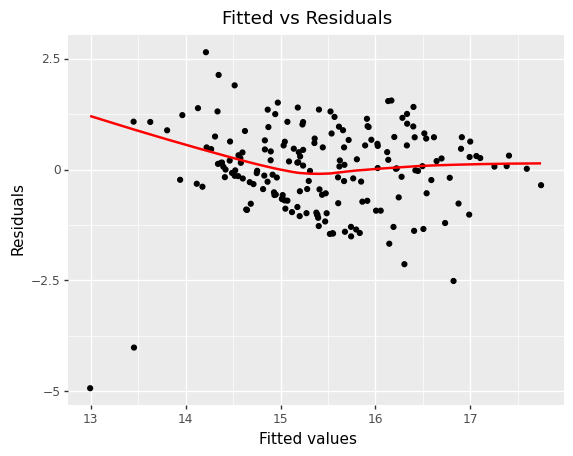

<ggplot: (8776509931246)>

In [44]:
(
    p9.ggplot(mapping = p9.aes(x = 'ols_res.fittedvalues', 
                                            y = "ols_res.resid_pearson"))
    + p9.geom_point()
    + p9.geom_smooth(color = "red")
    + p9.labs(title = "Fitted vs Residuals", x = 'Fitted values', y = 'Residuals')
)

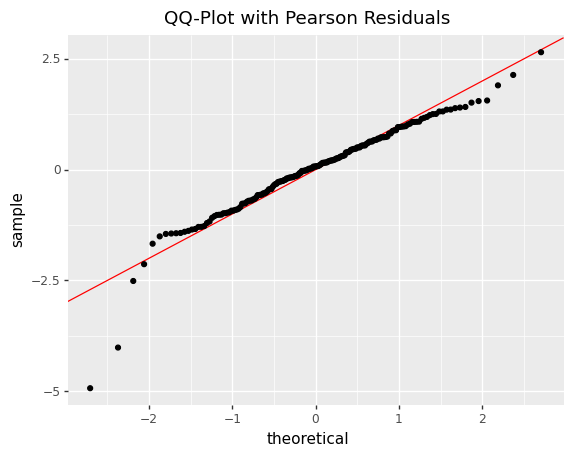

<ggplot: (8776505641894)>

In [45]:
(
    p9.ggplot(mapping = p9.aes(sample = "ols_res.resid_pearson"))
    + p9.geom_abline(p9.aes(intercept = 0, slope = 1), color = 'red')
    + p9.stats.stat_qq()
    + p9.labs(title = "QQ-Plot with Pearson Residuals")
)

In [46]:
df["Residuals"] = ols_res.resid_pearson
temp_df2 = df[round(df["Residuals"]) < -2]
temp_df2

,const,GP,MIN,PTS,DR,AST,FT%,2P%,SC-EFF,Salary,Residuals
105,1.00000,14,5.70000,4.10000,1.20000,0.10000,48.60000,71.40000,2.03600,19186.00000,-4.01345
138,1.00000,5,10.80000,3.60000,1.00000,0.60000,0.00000,0.00000,1.20000,5318.00000,-4.93042
176,1.00000,12,33.50000,24.70000,4.40000,4.80000,91.20000,47.70000,1.39000,2130240.00000,-2.51155


In [47]:
df = df.drop(temp_df2.index)
df = df.drop("Residuals", axis = "columns")

In [48]:
ols = sm.OLS(np.log(df['Salary']),df.drop(columns = 'Salary')) 
ols_res = ols.fit() 
ols_res.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     26.80
Date:                Thu, 01 Dec 2022   Prob (F-statistic):           1.33e-26
Time:                        23:13:08   Log-Likelihood:                -192.65
No. Observations:                 180   AIC:                             403.3
Df Residuals:                     171   BIC:                             432.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.3346      0.310     46.249      0.000      13.723      14.946
GP            -0.0205      0.014     -1.483      0.140      -0.048       0.007
MIN            0.0428      0.015      2.896      0.004       0.014       0.072
PTS            0.0362      0.016      2.230      0.027       0.004       0.068
DR             0.1016      0.046      2.186      0.030       0.010       0.193
AST            0.0502      0.042      1.191      0.235      -0.033       0.133
FT%            0.0012      0.003      0.360      0.719      -0.005       0.008
2P%           -0.0047      0.006     -0.751      0.454      -0.017       0.008
SC-EFF         0.0317      0.326      0.097      0.923      -0.612       0.676
==============================================================================
Omnibus:                        3.313   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.191   Jarque-Bera (JB):                2.372
Skew:                          -0.109   Prob(JB):                        0.305
Kurtosis:                       2.481   Cond. No.                         632.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/home/mattmori/anaconda3/lib/python3.9/site-packages/plotnine/stats/smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


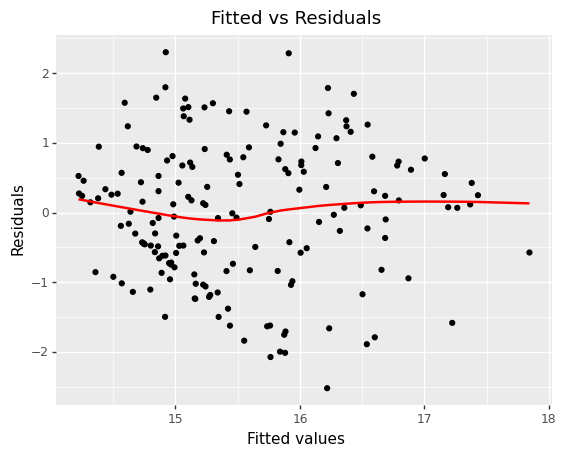

<ggplot: (8776491912524)>

In [49]:
(
    p9.ggplot(mapping = p9.aes(x = 'ols_res.fittedvalues', 
                                            y = "ols_res.resid_pearson"))
    + p9.geom_point()
    + p9.geom_smooth(color = "red")
    + p9.labs(title = "Fitted vs Residuals", x = 'Fitted values', y = 'Residuals')
)

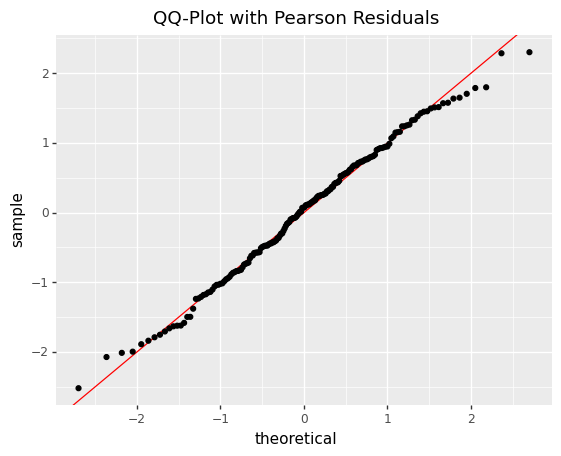

<ggplot: (8776491854029)>

In [50]:
(
    p9.ggplot(mapping = p9.aes(sample = "ols_res.resid_pearson"))
    + p9.geom_abline(p9.aes(intercept = 0, slope = 1), color = 'red')
    + p9.stats.stat_qq()
    + p9.labs(title = "QQ-Plot with Pearson Residuals")
)

### KINGS

In [51]:
kings_df

,Name,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,PER,Salary
0,De'Aaron Fox,9.10000,17.30000,52.20000,2.00000,5.20000,38.70000,4.20000,5.10000,82.40000,7.10000,12.20000,58.00000,1.40100,0.58000,18,18.00000,32.10000,24.30000,0.60000,4.40000,4.90000,6.00000,1.20000,0.50000,2.60000,2.70000,2.30000,23.54000,"$28,103,550"
1,Domantas Sabonis,6.10000,10.40000,58.60000,0.30000,1.20000,27.30000,4.40000,5.90000,74.30000,5.80000,9.30000,62.50000,1.62600,0.60000,19,19.00000,32.60000,16.90000,2.20000,8.80000,11.10000,6.40000,0.80000,0.50000,2.50000,3.80000,2.50000,21.53000,"$18,500,000"
2,Kevin Huerter,5.60000,11.40000,48.80000,3.30000,7.20000,45.60000,1.60000,2.40000,68.90000,2.30000,4.30000,54.30000,1.40600,0.63000,19,19.00000,32.20000,16.10000,0.40000,2.90000,3.30000,3.40000,1.10000,0.50000,1.60000,2.40000,2.10000,15.33000,"$14,508,929"
3,Malik Monk,5.20000,10.80000,48.10000,1.90000,5.50000,35.20000,1.90000,2.10000,90.00000,3.30000,5.30000,61.40000,1.31600,0.57000,19,0.00000,22.60000,14.30000,0.40000,1.70000,2.10000,4.30000,0.60000,0.20000,1.80000,1.80000,2.40000,18.48000,"$9,472,219"
4,Harrison Barnes,3.90000,8.40000,46.50000,0.90000,3.20000,28.30000,4.10000,4.70000,86.50000,3.00000,5.20000,57.60000,1.52200,0.52000,19,19.00000,30.70000,12.70000,1.20000,4.30000,5.50000,1.90000,0.80000,0.20000,1.20000,1.40000,1.70000,13.96000,"$18,352,273"
5,Keegan Murray,3.90000,9.60000,40.20000,1.80000,5.40000,32.60000,0.90000,1.10000,83.30000,2.10000,4.20000,50.00000,1.07900,0.49000,17,15.00000,28.80000,10.40000,0.80000,3.00000,3.80000,1.00000,0.80000,0.60000,1.60000,2.10000,0.60000,7.91000,"$8,008,440"
6,Terence Davis,2.40000,5.20000,45.70000,1.40000,3.40000,41.00000,0.70000,0.80000,85.70000,1.00000,1.80000,54.50000,1.30900,0.59000,18,1.00000,13.10000,6.80000,0.40000,2.50000,2.90000,1.40000,0.70000,0.20000,0.70000,1.80000,1.90000,17.05000,"$4,000,000"
7,Trey Lyles,2.20000,5.30000,41.20000,1.30000,3.80000,35.00000,1.00000,1.40000,72.70000,0.90000,1.60000,56.00000,1.25900,0.54000,16,0.00000,14.70000,6.70000,1.10000,1.80000,2.80000,0.80000,0.40000,0.40000,1.10000,1.10000,0.70000,12.51000,"$2,700,000"
8,Davion Mitchell,2.70000,5.80000,45.90000,0.80000,2.60000,32.00000,0.40000,0.60000,72.70000,1.80000,3.20000,57.40000,1.13500,0.53000,19,1.00000,19.10000,6.60000,0.10000,1.20000,1.30000,2.10000,0.40000,0.10000,1.10000,1.50000,2.00000,8.41000,"$4,833,600"
9,Chimezie Metu,2.20000,3.80000,57.90000,0.20000,1.00000,20.00000,0.70000,0.70000,90.90000,2.00000,2.80000,71.40000,1.38600,0.61000,15,0.00000,12.10000,5.30000,0.50000,2.40000,2.90000,0.70000,0.30000,0.10000,0.70000,1.10000,1.00000,14.55000,"$1,910,680"


In [52]:
rearrange = kings_df.iloc[:,0:15]
rearrange_no_name = rearrange.iloc[:,1:]
rearrange

,Name,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF
0,De'Aaron Fox,9.10000,17.30000,52.20000,2.00000,5.20000,38.70000,4.20000,5.10000,82.40000,7.10000,12.20000,58.00000,1.40100,0.58000
1,Domantas Sabonis,6.10000,10.40000,58.60000,0.30000,1.20000,27.30000,4.40000,5.90000,74.30000,5.80000,9.30000,62.50000,1.62600,0.60000
2,Kevin Huerter,5.60000,11.40000,48.80000,3.30000,7.20000,45.60000,1.60000,2.40000,68.90000,2.30000,4.30000,54.30000,1.40600,0.63000
3,Malik Monk,5.20000,10.80000,48.10000,1.90000,5.50000,35.20000,1.90000,2.10000,90.00000,3.30000,5.30000,61.40000,1.31600,0.57000
4,Harrison Barnes,3.90000,8.40000,46.50000,0.90000,3.20000,28.30000,4.10000,4.70000,86.50000,3.00000,5.20000,57.60000,1.52200,0.52000
5,Keegan Murray,3.90000,9.60000,40.20000,1.80000,5.40000,32.60000,0.90000,1.10000,83.30000,2.10000,4.20000,50.00000,1.07900,0.49000
6,Terence Davis,2.40000,5.20000,45.70000,1.40000,3.40000,41.00000,0.70000,0.80000,85.70000,1.00000,1.80000,54.50000,1.30900,0.59000
7,Trey Lyles,2.20000,5.30000,41.20000,1.30000,3.80000,35.00000,1.00000,1.40000,72.70000,0.90000,1.60000,56.00000,1.25900,0.54000
8,Davion Mitchell,2.70000,5.80000,45.90000,0.80000,2.60000,32.00000,0.40000,0.60000,72.70000,1.80000,3.20000,57.40000,1.13500,0.53000
9,Chimezie Metu,2.20000,3.80000,57.90000,0.20000,1.00000,20.00000,0.70000,0.70000,90.90000,2.00000,2.80000,71.40000,1.38600,0.61000


In [53]:
kings_df = kings_df.drop(rearrange_no_name, axis = "columns")
kings_df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,PER,Salary
0,De'Aaron Fox,18,18.00000,32.10000,24.30000,0.60000,4.40000,4.90000,6.00000,1.20000,0.50000,2.60000,2.70000,2.30000,23.54000,"$28,103,550"
1,Domantas Sabonis,19,19.00000,32.60000,16.90000,2.20000,8.80000,11.10000,6.40000,0.80000,0.50000,2.50000,3.80000,2.50000,21.53000,"$18,500,000"
2,Kevin Huerter,19,19.00000,32.20000,16.10000,0.40000,2.90000,3.30000,3.40000,1.10000,0.50000,1.60000,2.40000,2.10000,15.33000,"$14,508,929"
3,Malik Monk,19,0.00000,22.60000,14.30000,0.40000,1.70000,2.10000,4.30000,0.60000,0.20000,1.80000,1.80000,2.40000,18.48000,"$9,472,219"
4,Harrison Barnes,19,19.00000,30.70000,12.70000,1.20000,4.30000,5.50000,1.90000,0.80000,0.20000,1.20000,1.40000,1.70000,13.96000,"$18,352,273"
5,Keegan Murray,17,15.00000,28.80000,10.40000,0.80000,3.00000,3.80000,1.00000,0.80000,0.60000,1.60000,2.10000,0.60000,7.91000,"$8,008,440"
6,Terence Davis,18,1.00000,13.10000,6.80000,0.40000,2.50000,2.90000,1.40000,0.70000,0.20000,0.70000,1.80000,1.90000,17.05000,"$4,000,000"
7,Trey Lyles,16,0.00000,14.70000,6.70000,1.10000,1.80000,2.80000,0.80000,0.40000,0.40000,1.10000,1.10000,0.70000,12.51000,"$2,700,000"
8,Davion Mitchell,19,1.00000,19.10000,6.60000,0.10000,1.20000,1.30000,2.10000,0.40000,0.10000,1.10000,1.50000,2.00000,8.41000,"$4,833,600"
9,Chimezie Metu,15,0.00000,12.10000,5.30000,0.50000,2.40000,2.90000,0.70000,0.30000,0.10000,0.70000,1.10000,1.00000,14.55000,"$1,910,680"


In [54]:
kings_df = pd.merge(kings_df,rearrange, how = "left", on = "Name")
salary = kings_df.pop("Salary")
kings_df = pd.concat([kings_df, salary], axis = 'columns')

In [55]:
kings_df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,De'Aaron Fox,18,18.00000,32.10000,24.30000,0.60000,4.40000,4.90000,6.00000,1.20000,0.50000,2.60000,2.70000,2.30000,23.54000,9.10000,17.30000,52.20000,2.00000,5.20000,38.70000,4.20000,5.10000,82.40000,7.10000,12.20000,58.00000,1.40100,0.58000,"$28,103,550"
1,Domantas Sabonis,19,19.00000,32.60000,16.90000,2.20000,8.80000,11.10000,6.40000,0.80000,0.50000,2.50000,3.80000,2.50000,21.53000,6.10000,10.40000,58.60000,0.30000,1.20000,27.30000,4.40000,5.90000,74.30000,5.80000,9.30000,62.50000,1.62600,0.60000,"$18,500,000"
2,Kevin Huerter,19,19.00000,32.20000,16.10000,0.40000,2.90000,3.30000,3.40000,1.10000,0.50000,1.60000,2.40000,2.10000,15.33000,5.60000,11.40000,48.80000,3.30000,7.20000,45.60000,1.60000,2.40000,68.90000,2.30000,4.30000,54.30000,1.40600,0.63000,"$14,508,929"
3,Malik Monk,19,0.00000,22.60000,14.30000,0.40000,1.70000,2.10000,4.30000,0.60000,0.20000,1.80000,1.80000,2.40000,18.48000,5.20000,10.80000,48.10000,1.90000,5.50000,35.20000,1.90000,2.10000,90.00000,3.30000,5.30000,61.40000,1.31600,0.57000,"$9,472,219"
4,Harrison Barnes,19,19.00000,30.70000,12.70000,1.20000,4.30000,5.50000,1.90000,0.80000,0.20000,1.20000,1.40000,1.70000,13.96000,3.90000,8.40000,46.50000,0.90000,3.20000,28.30000,4.10000,4.70000,86.50000,3.00000,5.20000,57.60000,1.52200,0.52000,"$18,352,273"
5,Keegan Murray,17,15.00000,28.80000,10.40000,0.80000,3.00000,3.80000,1.00000,0.80000,0.60000,1.60000,2.10000,0.60000,7.91000,3.90000,9.60000,40.20000,1.80000,5.40000,32.60000,0.90000,1.10000,83.30000,2.10000,4.20000,50.00000,1.07900,0.49000,"$8,008,440"
6,Terence Davis,18,1.00000,13.10000,6.80000,0.40000,2.50000,2.90000,1.40000,0.70000,0.20000,0.70000,1.80000,1.90000,17.05000,2.40000,5.20000,45.70000,1.40000,3.40000,41.00000,0.70000,0.80000,85.70000,1.00000,1.80000,54.50000,1.30900,0.59000,"$4,000,000"
7,Trey Lyles,16,0.00000,14.70000,6.70000,1.10000,1.80000,2.80000,0.80000,0.40000,0.40000,1.10000,1.10000,0.70000,12.51000,2.20000,5.30000,41.20000,1.30000,3.80000,35.00000,1.00000,1.40000,72.70000,0.90000,1.60000,56.00000,1.25900,0.54000,"$2,700,000"
8,Davion Mitchell,19,1.00000,19.10000,6.60000,0.10000,1.20000,1.30000,2.10000,0.40000,0.10000,1.10000,1.50000,2.00000,8.41000,2.70000,5.80000,45.90000,0.80000,2.60000,32.00000,0.40000,0.60000,72.70000,1.80000,3.20000,57.40000,1.13500,0.53000,"$4,833,600"
9,Chimezie Metu,15,0.00000,12.10000,5.30000,0.50000,2.40000,2.90000,0.70000,0.30000,0.10000,0.70000,1.10000,1.00000,14.55000,2.20000,3.80000,57.90000,0.20000,1.00000,20.00000,0.70000,0.70000,90.90000,2.00000,2.80000,71.40000,1.38600,0.61000,"$1,910,680"


In [56]:
#replace all the "--" and NAN to 0

kings_df['Salary'] = kings_df['Salary'].replace("--", '0')
kings_df['Salary'] = kings_df['Salary'].replace(np.NaN, '0')
#remove $ and , signals
for i in range(0,len(kings_df)):
    kings_df['Salary'][i] = kings_df['Salary'][i].lstrip('$')
    kings_df['Salary'][i] = kings_df['Salary'][i].replace(',','')
    #turn Salary to numbers
    kings_df['Salary'][i] = int(kings_df['Salary'][i])
#replace all 0 to NAN
kings_df['Salary'] = kings_df['Salary'].replace(0, np.NaN)
#drop all NAN
kings_df = kings_df.dropna()

/tmp/ipykernel_3987/1469477879.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_3987/1469477879.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_3987/1469477879.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [57]:
kings_names = kings_df["Name"]

In [58]:
kings_df

,Name,GP,GS,MIN,PTS,OR,DR,REB,AST,STL,BLK,TO,PF,AST/TO,PER,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,2PM,2PA,2P%,SC-EFF,SH-EFF,Salary
0,De'Aaron Fox,18,18.00000,32.10000,24.30000,0.60000,4.40000,4.90000,6.00000,1.20000,0.50000,2.60000,2.70000,2.30000,23.54000,9.10000,17.30000,52.20000,2.00000,5.20000,38.70000,4.20000,5.10000,82.40000,7.10000,12.20000,58.00000,1.40100,0.58000,28103550.00000
1,Domantas Sabonis,19,19.00000,32.60000,16.90000,2.20000,8.80000,11.10000,6.40000,0.80000,0.50000,2.50000,3.80000,2.50000,21.53000,6.10000,10.40000,58.60000,0.30000,1.20000,27.30000,4.40000,5.90000,74.30000,5.80000,9.30000,62.50000,1.62600,0.60000,18500000.00000
2,Kevin Huerter,19,19.00000,32.20000,16.10000,0.40000,2.90000,3.30000,3.40000,1.10000,0.50000,1.60000,2.40000,2.10000,15.33000,5.60000,11.40000,48.80000,3.30000,7.20000,45.60000,1.60000,2.40000,68.90000,2.30000,4.30000,54.30000,1.40600,0.63000,14508929.00000
3,Malik Monk,19,0.00000,22.60000,14.30000,0.40000,1.70000,2.10000,4.30000,0.60000,0.20000,1.80000,1.80000,2.40000,18.48000,5.20000,10.80000,48.10000,1.90000,5.50000,35.20000,1.90000,2.10000,90.00000,3.30000,5.30000,61.40000,1.31600,0.57000,9472219.00000
4,Harrison Barnes,19,19.00000,30.70000,12.70000,1.20000,4.30000,5.50000,1.90000,0.80000,0.20000,1.20000,1.40000,1.70000,13.96000,3.90000,8.40000,46.50000,0.90000,3.20000,28.30000,4.10000,4.70000,86.50000,3.00000,5.20000,57.60000,1.52200,0.52000,18352273.00000
5,Keegan Murray,17,15.00000,28.80000,10.40000,0.80000,3.00000,3.80000,1.00000,0.80000,0.60000,1.60000,2.10000,0.60000,7.91000,3.90000,9.60000,40.20000,1.80000,5.40000,32.60000,0.90000,1.10000,83.30000,2.10000,4.20000,50.00000,1.07900,0.49000,8008440.00000
6,Terence Davis,18,1.00000,13.10000,6.80000,0.40000,2.50000,2.90000,1.40000,0.70000,0.20000,0.70000,1.80000,1.90000,17.05000,2.40000,5.20000,45.70000,1.40000,3.40000,41.00000,0.70000,0.80000,85.70000,1.00000,1.80000,54.50000,1.30900,0.59000,4000000.00000
7,Trey Lyles,16,0.00000,14.70000,6.70000,1.10000,1.80000,2.80000,0.80000,0.40000,0.40000,1.10000,1.10000,0.70000,12.51000,2.20000,5.30000,41.20000,1.30000,3.80000,35.00000,1.00000,1.40000,72.70000,0.90000,1.60000,56.00000,1.25900,0.54000,2700000.00000
8,Davion Mitchell,19,1.00000,19.10000,6.60000,0.10000,1.20000,1.30000,2.10000,0.40000,0.10000,1.10000,1.50000,2.00000,8.41000,2.70000,5.80000,45.90000,0.80000,2.60000,32.00000,0.40000,0.60000,72.70000,1.80000,3.20000,57.40000,1.13500,0.53000,4833600.00000
9,Chimezie Metu,15,0.00000,12.10000,5.30000,0.50000,2.40000,2.90000,0.70000,0.30000,0.10000,0.70000,1.10000,1.00000,14.55000,2.20000,3.80000,57.90000,0.20000,1.00000,20.00000,0.70000,0.70000,90.90000,2.00000,2.80000,71.40000,1.38600,0.61000,1910680.00000


In [59]:
kings_df = df_clean(kings_df)

In [60]:
#Model Selection
#kings_df = kings_df.drop("MIN", axis = "columns")
#kings_df = kings_df.drop("SC-EFF", axis = "columns")
#kings_df = kings_df.drop("BLK", axis = "columns")
#kings_df = kings_df.drop("GS", axis = "columns")
#kings_df = kings_df.drop("2P%", axis = "columns")
#kings_df = kings_df.drop("FT%", axis = "columns")
#kings_df = kings_df.drop("TO", axis = "columns")
#kings_df = kings_df.drop("AST/TO", axis = "columns")
#kings_df = kings_df.drop("PF", axis = "columns")
#kings_df = kings_df.drop("PER", axis = "columns")
#kings_df = kings_df.drop("SH-EFF", axis = "columns")
#kings_df = kings_df.drop("3P%", axis = "columns")

In [61]:
kings_df = kings_df.drop("OR", axis = "columns")
kings_df = kings_df.drop("STL", axis = "columns")
kings_df = kings_df.drop("PF", axis = "columns")
kings_df = kings_df.drop("TO", axis = "columns")
kings_df = kings_df.drop("BLK", axis = "columns")
kings_df = kings_df.drop("FG%", axis = "columns")
kings_df = kings_df.drop("AST/TO", axis = "columns")
kings_df = kings_df.drop("SH-EFF", axis = "columns")
kings_df = kings_df.drop("GS", axis = "columns")
kings_df = kings_df.drop("REB", axis = "columns") 
kings_df = kings_df.drop("3P%", axis = "columns")
kings_df = kings_df.drop("PER", axis = "columns")
#kings_df = kings_df.drop("SC-EFF", axis = "columns")

In [62]:
kings_df = sm.add_constant(kings_df)

In [63]:
kings_df["GP"] = kings_df["GP"].astype("float64")

In [64]:
ols_res.predict(kings_df.drop(columns = 'Salary'))

0    16.83837
1    17.01477
2    16.24384
3    15.68055
4    16.13288
5    15.84976
6    14.98596
7    14.96630
8    15.08323
9    14.83456
10   14.70874
12   14.51140
13   14.25827
14   14.32369
dtype: float64

DO I NEED THIS? DON'T I JUST USE THE PREDICTED VALUES FROM THE OTHER MODEL?

In [65]:
#kings_ols = sm.OLS(np.log(kings_df['Salary']),kings_df.drop(columns = 'Salary')) 
#kings_ols_res = kings_ols.fit() 
#kings_ols_res.summary()

In [66]:
kings_df["Predicted"] = np.exp(ols_res.predict(kings_df.drop(columns = 'Salary')))
kings_df.insert(0,"Names",kings_names)
kings_df["Residuals"]= kings_df["Salary"]-kings_df["Predicted"]

In [67]:
kings_df

,Names,const,GP,MIN,PTS,DR,AST,FT%,2P%,SC-EFF,Salary,Predicted,Residuals
0,De'Aaron Fox,1.00000,18.00000,32.10000,24.30000,4.40000,6.00000,82.40000,58.00000,1.40100,28103550.00000,20550023.15073,7553526.84927
1,Domantas Sabonis,1.00000,19.00000,32.60000,16.90000,8.80000,6.40000,74.30000,62.50000,1.62600,18500000.00000,24514481.51619,-6014481.51619
2,Kevin Huerter,1.00000,19.00000,32.20000,16.10000,2.90000,3.40000,68.90000,54.30000,1.40600,14508929.00000,11339878.12251,3169050.87749
3,Malik Monk,1.00000,19.00000,22.60000,14.30000,1.70000,4.30000,90.00000,61.40000,1.31600,9472219.00000,6456189.87562,3016029.12438
4,Harrison Barnes,1.00000,19.00000,30.70000,12.70000,4.30000,1.90000,86.50000,57.60000,1.52200,18352273.00000,10148940.38679,8203332.61321
5,Keegan Murray,1.00000,17.00000,28.80000,10.40000,3.00000,1.00000,83.30000,50.00000,1.07900,8008440.00000,7646516.64570,361923.35430
6,Terence Davis,1.00000,18.00000,13.10000,6.80000,2.50000,1.40000,85.70000,54.50000,1.30900,4000000.00000,3223436.04518,776563.95482
7,Trey Lyles,1.00000,16.00000,14.70000,6.70000,1.80000,0.80000,72.70000,56.00000,1.25900,2700000.00000,3160695.67965,-460695.67965
8,Davion Mitchell,1.00000,19.00000,19.10000,6.60000,1.20000,2.10000,72.70000,57.40000,1.13500,4833600.00000,3552747.39809,1280852.60191
9,Chimezie Metu,1.00000,15.00000,12.10000,5.30000,2.40000,0.70000,90.90000,71.40000,1.38600,1910680.00000,2770559.66509,-859879.66509


In [68]:
kings_df["Salary"] = np.log(kings_df["Salary"])
kings_df["Predicted"] =  np.log(kings_df["Predicted"])
kings_df["Residuals"]= kings_df["Salary"]-kings_df["Predicted"]
kings_df

,Names,const,GP,MIN,PTS,DR,AST,FT%,2P%,SC-EFF,Salary,Predicted,Residuals
0,De'Aaron Fox,1.00000,18.00000,32.10000,24.30000,4.40000,6.00000,82.40000,58.00000,1.40100,17.15141,16.83837,0.31303
1,Domantas Sabonis,1.00000,19.00000,32.60000,16.90000,8.80000,6.40000,74.30000,62.50000,1.62600,16.73328,17.01477,-0.28149
2,Kevin Huerter,1.00000,19.00000,32.20000,16.10000,2.90000,3.40000,68.90000,54.30000,1.40600,16.49027,16.24384,0.24644
3,Malik Monk,1.00000,19.00000,22.60000,14.30000,1.70000,4.30000,90.00000,61.40000,1.31600,16.06387,15.68055,0.38332
4,Harrison Barnes,1.00000,19.00000,30.70000,12.70000,4.30000,1.90000,86.50000,57.60000,1.52200,16.72526,16.13288,0.59238
5,Keegan Murray,1.00000,17.00000,28.80000,10.40000,3.00000,1.00000,83.30000,50.00000,1.07900,15.89601,15.84976,0.04625
6,Terence Davis,1.00000,18.00000,13.10000,6.80000,2.50000,1.40000,85.70000,54.50000,1.30900,15.20180,14.98596,0.21585
7,Trey Lyles,1.00000,16.00000,14.70000,6.70000,1.80000,0.80000,72.70000,56.00000,1.25900,14.80876,14.96630,-0.15754
8,Davion Mitchell,1.00000,19.00000,19.10000,6.60000,1.20000,2.10000,72.70000,57.40000,1.13500,15.39110,15.08323,0.30787
9,Chimezie Metu,1.00000,15.00000,12.10000,5.30000,2.40000,0.70000,90.90000,71.40000,1.38600,14.46297,14.83456,-0.37159


In [69]:
kings_df["Residuals"].sum()

3.162581728674782

(
    p9.ggplot(mapping = p9.aes(x = 'kings_ols_res.fittedvalues', 
                                            y = "kings_ols_res.resid_pearson"))
    + p9.geom_point()
    + p9.labs(title = "Fitted vs Residuals", x = 'Fitted values', y = 'Residuals')
)

(
    p9.ggplot(mapping = p9.aes(sample = "kings_ols_res.resid_pearson"))
    + p9.geom_abline(p9.aes(intercept = 0, slope = 1), color = 'red')
    + p9.stats.stat_qq()
    + p9.labs(title = "QQ-Plot with Pearson Residuals")
)